In [466]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.special import jv, yv
import matplotlib.pyplot as plt
import mpmath
from scipy.integrate import quad
from scipy.special import kn, k1
from scipy.special import zeta
# Physical constants (natural units: GeV, s^-1)
M_pl = 2.435e18          # Planck mass [GeV]
fermi_constant = 1.166e-5           # Fermi constant [GeV^-2]
m_N = 0.1 # HNL Mass in GeV
m_a = 1e-6 # ALP mass in GeV
mixing_parameter_squared = 1e-10 # active-sterile neutrino sector mixing
f_a = 1e3 # ALP decay constant scenario 1


#f_M = 0.1 # in GeV

Light Neutrino Mass Deppisch 2024 \
$m_\nu =  |U_{eN}|^2 m_N$


In [467]:
m_nu = mixing_parameter_squared*m_N

Particle Species Equilibrium Density in the Relativistic Limit

Baumann Cosmology Equation 3.22

$n = \frac{\zeta (3)}{\pi^2} * g * (\frac{m_N}{z})^3 $ for bosons.

For fermions multiply with a prefactor of $\frac{3}{4}$

In [468]:
def n_X_eq_bosons(g, mass, z): #g is the degrees of freedom 
    n_eq = zeta(3) * g *( (mass/ z)**3 ) * (1/np.pi **2)
    return n_eq

In [469]:
def n_X_eq_fermions(g, mass, z): #g is the degrees of freedom 
    n_eq = 0.75 * zeta(3) * g *( (mass/ z)**3 ) * (1/np.pi **2)

In [470]:
z_init = 1e-4
z_final = 1e2
mass_temp_ratio=  np.linspace(z_init,z_final, 100)

Decay Width of $N \rightarrow a \nu$ Deppisch 2024 equation 2.21 \
$\Gamma_{N \rightarrow a \nu} = \frac{|U_{eN}|^2 m_{N}^3}{4 \pi f_{a}^2} \sqrt{1+ (\frac{m_a}{m_N})^2}(1-(\frac{m_a}{m_N})^2)^\frac{3}{2}$

In [471]:
def decay_width_N_av(f_a,m_N,mixing_parameter_squared, m_a):
    decay_width_N_av = mixing_parameter_squared*(m_N**3)*(1/(4*np.pi*(f_a**2)))*(np.sqrt(1+ (m_a/m_N)**2))*((1-(m_a/m_N)**2)**1.5)
    return decay_width_N_av


$\Gamma_{a \rightarrow \nu \nu} = \frac{1}{f_{a}^2} \frac{m_{N}^2 m_a |U_{eN}|^4}{2 \pi} \sqrt{1 - \frac{4 m_{\nu}^2 }{m_{a}^2}} (1 - \frac{2 m_{\nu}^2}{m_{a}^2})$

In [472]:
def decay_width_a_vv(f_a, m_N, mixing_parameter_squared, m_a, m_v):
    decay_width_a_vv = (1/(2* np.pi * f_a**2))*m_N**2 * m_a *( mixing_parameter_squared**2) * (np.sqrt(1- (4*m_nu**2)/m_a**2)) * (1- (2*m_nu**2)/m_a**2)
    #decay_width_a_vv = ((m_N**2 )* m_a * (mixing_parameter_squared**2))/(2* np.pi * f_a**2)
    return decay_width_a_vv

Below I will implement the total decay width for the N-> SM process equations 2.10-2.20 Deppisch et al 2024

$N \to \nu \ell^- \ell^+$: mediated by charged (for $\ell = e$) and neutral currents (for $\ell = e, \mu, \tau$) corresponding decay width is (with $x_\ell = m_\ell / m_N$)

$$
\Gamma^{\nu_{e} \ell^- \ell^+} = |U_{eN}|^2 \frac{G_F^2 m_N^5}{96\pi^3} \left[ (C_1 + 2\sin^2\theta_W\delta_{e,\ell})f_1(x_\ell) + (C_2 + \sin^2\theta_W\delta_{e,\ell})f_2(x_\ell) \right]
$$

with

$$
C_1 = \frac{1}{4}(1 - 4\sin^2\theta_W + 8\sin^4\theta_W), \quad C_2 = \frac{1}{2}(-\sin^2\theta_W + 2\sin^4\theta_W)
$$

and the functions are defined as

$
f_1(x) = (1 - 14x^2 - 2x^4 - 12x^6)\sqrt{1 - 4x^2} + 12x^4(x^4 - 1)L(x)$ ,

$ f_2(x) = 4\left[x^2(2 + 10x^2 - 12x^4)\sqrt{1 - 4x^2} + 6x^4(1 - 2x^2 + 2x^4)L(x)\right], $


with

$$
L(x) = \ln\left[ \frac{1 - 3x^2 - (1 - x^2)\sqrt{1 - 4x^2}}{x^2(1 + \sqrt{1 - 4x^2})} \right].
$$

$N \to e^- \ell^+ \nu_\ell$: mediated by a charged current with $\ell = \mu, \tau$. The decay width for this process is
$$
\Gamma^{e^- \ell^+ \nu_\ell} = |U_{eN}|^2 \frac{G_F^2 m_N^5}{192\pi^3} \left[ 1 - 8x_\ell^2 + 8x_\ell^6 - x_\ell^8 - 12x_\ell^4 \ln(x_\ell^2) \right]. \tag{2.14}
$$

$N \to \nu_e \nu_\ell \bar{\nu}_\ell$: mediated by a neutral current with $\ell = e, \mu, \tau$. The decay width can be written as

$\Gamma^{\nu_e \nu_\ell \bar{\nu}_\ell} = \frac{G_F^2}{96\pi^3}|U_{eN}|^2 m_N^5.  $

$N \to P \nu_e$: with a neutral pseudoscalar meson $P = \pi^0, K^0, \eta, \eta'$. The decay width is


$\Gamma^{P\nu_e} = \frac{G_F^2 m_N^3}{32\pi} f_P^2 |U_{eN}|^2(1 - x_P^2)^2, $

with the meson decay constant $f_P$ whose values we have taken from [15] and $x_P = m_P/m_N$.

$N \to P^+ e^-$: with a charged pseudoscalar meson $ P^+ = \pi^+, K^+, D^+, D_s^+$. The decay width is 

$\Gamma^{P^+ e^-} = \frac{G_F^2 m_N^3}{16\pi f_P^2} |U_{eN}|^2 |V_{qq'}|^2 \lambda^{1/2}(1, x_P^2, x_e^2) \left[ 1 - x_P^2 - x_e^2(2 + x_P^2 - x_e^2) \right]. $

where $V_{qq'}$ denotes the CKM mixing matrix element involving relevant quarks in the produced meson and $\lambda(a, b, c) \equiv (a - b - c)^2 - 4bc$.

$N \to V \nu_e$: with a neutral vector meson $V = \rho, \omega, \phi, K^{*0}$. The decay width can be written as

$\Gamma^{V\nu_e} = \frac{G_F^2 m_N^3}{32\pi m_V^2} f_V^2 \kappa_V^2 |U_{eN}|^2 (1 + 2x_V^2)(1 - x_V^2)^2$

where $f_V$ and $\kappa_V$ represent the decay constant and the vector coupling associated with the produced neutral vector mesons, respectively.

$N \to V^+ e^-$: with a charged vector meson $V^+ = \rho^+, K^{*+}$. The decay width can be written as

$\Gamma^{V^+ e^-} = \frac{G_F^2 m_N^3}{16\pi m_{V^\pm}^2} f_V^2 |U_{eN}|^2 |V_{qq'}|^2 \lambda^{1/2}(1, x_V^2, x_e^2) \left[ (1 - x_V^2)(1 + 2x_V^2) + x_e^2(x_V^2 + x_e^2 - 2) \right]. $


The total decay width for a Majorana HNL decaying into purely SM particles is then

$\Gamma^{N \to \text{SM}} =  \sum_\ell \Gamma^{\nu_e \ell^- \ell^+} + 2\sum_{\ell=\mu,\tau} \Gamma^{e^- \ell^+ \nu_\ell} + \sum_\ell \Gamma^{\nu_e \nu_\ell \bar{\nu}_\ell}  $


$+ \sum_P \Gamma^{P\nu_e} + 2\sum_P \Gamma^{P^+ e^-} + \sum_V \Gamma^{V\nu_e} + \sum_V 2\Gamma^{V^+ e^-}.$


The factors of two are due to the Majorana HNL decaying into opposite charge combinations, e.g., $\Gamma^{P^- e^+} = \Gamma^{P^+ e^-}$.





In [473]:
#Full Version of N-> SM
sin2w = 0.23126

cosw2 = 1 - sin2w

def L_func(x):
    """Eq. (2.13)"""
    return np.log((1 - 3*x**2 - (1-x**2) * (np.sqrt(1 - 4*x**2))) / (x**2 * (1 + np.sqrt(1 - 4*x**2))))

def f1(x):
    """Eq. (2.12), first Bessel term"""
    sqrt = np.sqrt(1 - 4*x**2)
    return (1 - 14*x**2 - 2*x**4 - 12*x**6)*sqrt + 12*x**4*(x**4 - 1)*L_func(x)

def f2(x):
    """Eq. (2.12), second Bessel term"""
    sqrt = np.sqrt(1 - 4*x**2)
    return 4*( x**2*(2 + 10*x**2 - 12*x**4)*sqrt + 6*x**4*(1 - 2*x**2 + 2*x**4)*L_func(x) )

def gamma_nu_ll(m_N, me, mixing_parameter_squared):
    """Eq. (2.10), N → ν_e ℓ⁻ ℓ⁺"""
    x = me/m_N
    C1 = 0.25*(1 - 4*sin2w + 8*sin2w**2)
    C2 = 0.5*(-sin2w + 2*sin2w**2)
    return mixing_parameter_squared * (fermi_constant**2 * m_N**5)/(96*np.pi**3) * ( (C1+2*sin2w)*f1(x) + (C2+sin2w)*f2(x) )

def gamma_e_l_nu(m_N, ml, mixing_parameter_squared):
    """Eq. (2.14), N → e⁻ ℓ⁺ νℓ"""
    x = ml/m_N
    return mixing_parameter_squared * (fermi_constant**2 * m_N**5)/(192*np.pi**3) * (1 - 8*x**2 + 8*x**6 - x**8 - 12*x**4*np.log(x**2))

def gamma_3nu(m_N, mixing_parameter_squared):
    """Eq. (2.15), N → ν ν ν"""
    return mixing_parameter_squared * (fermi_constant**2 * m_N**5)/(96*np.pi**3)

#Idea solve my running through the indexes of the array ie array[i]
def gamma_P_nu(m_N, mP, fP, mixing_parameter_squared):
    """Eq. (2.16), N → P⁰ ν"""
    xP = mP/m_N
    return mixing_parameter_squared * ((fermi_constant**2 * m_N**3 * fP**2)/(32*np.pi)) * (1 - xP**2)**2

def gamma_Pp_e(m_N, mP, fP, Vqq, mixing_parameter_squared):
    """Eq. (2.17), N → P⁺ e⁻"""
    xP = mP/m_N
    xe = 0  # assume m_e negligible
    lam = (1 - xP**2 - xe**2)**2 - 4*xP**2*xe**2
    return mixing_parameter_squared * (fermi_constant**2 * m_N**3 * fP**2 * Vqq**2)/(16*np.pi) * np.sqrt(lam) * ((1 - xP**2)**2 - xe**2*(2 + xP**2 - xe**2))

def gamma_V_nu(m_N, mV, fV, kappaV, mixing_parameter_squared):
    """Eq. (2.18), N → V⁰ ν"""
    xV = mV/m_N
    return mixing_parameter_squared * (fermi_constant**2 * m_N**3 * fV**2 * kappaV**2)/(32*np.pi * mV**2) * (1 + 2*xV**2)*(1 - xV**2)**2

def gamma_Vp_e(m_N, mV, fV, Vqq, mixing_parameter_squared):
    """Eq. (2.19), N → V⁺ e⁻"""
    xV = mV/m_N
    xe = 0
    lam = (1 - xV**2 - xe**2)**2 - 4*xV**2*xe**2
    return mixing_parameter_squared * (fermi_constant**2 * m_N**3 * fV**2 * Vqq**2)/(16*np.pi * mV**2) * np.sqrt(lam) * ((1 - xV**2)*(1 + 2*xV**2) + xe**2*(xV**2 + xe**2 - 2))

def gamma_N_to_SM(m_N, mixing_parameter_squared):
    """Eq. (2.20): sum over all open SM channels."""
    g = 0.
    # leptonic
    for mℓ in [0.000511] :  # lepton masses in GeV, due to the square root of the equation only the electron is possible 
        g += gamma_nu_ll(m_N, mℓ, mixing_parameter_squared)
    for mℓ in [0.1057, 1.777]:
        g += 2*gamma_e_l_nu(m_N, mℓ, mixing_parameter_squared)
    g += 3*gamma_3nu(m_N, mixing_parameter_squared) # for each of the 3 possible neutrino generations
    # pseudoscalars neutral, good trial
    pseudoscalar_neutral_mesons = [
        {'m':0.1349766, 'f':0.13},  # pion_neutral
        {'m':0.497614 , 'f':0.156},  # kaon neutral 
        {'m':0.547862 , 'f':0.1647},   #eta
        {'m':0.95778 , 'f':0.1529},   #eta prime
        
    ]
    for P in pseudoscalar_neutral_mesons:
        g += gamma_P_nu(m_N, P['m'], P['f'], mixing_parameter_squared)
        
        #g += 2*gamma_Pp_e(m_N, P['m'], P['f'], P['CKM'], mixing_parameter_squared)
    # vector mesons (example)
    pseudoscalar_charged_mesons = [
        {'m':0.13957, 'f':0.1307, 'CKM':0.974}, #pion charged, CKM: |V_ud|
        {'m':0.493677, 'f':0.1598, 'CKM': 0.225}, #kaon charged CKM: |V_us|
        {'m':1.86961, 'f':0.2226, 'CKM':0.225}, # D meson charged |V_cd|
        {'m':1.96830, 'f':0.266, 'CKM':0.973}, # D strange meson charged 
    ]
    
    for P in pseudoscalar_charged_mesons:
        g += 2*gamma_Pp_e(m_N, P['m'], P['f'], P['CKM'], mixing_parameter_squared)
    
        
    vector_neutral_mesons = [
        {'m':0.77526, 'f':0.229, 'kappa':0.077 }, # rho neutral meson Come back and check this one
        {'m':0.78265, 'f':0.195, 'kappa':0.077}, #omega vector meson
        {'m':1.019461, 'f':0.229, 'kappa': -0.1729}, #phi vector meson
        {'m':0.89581, 'f':0.217,'kappa': -0.1729}, # kaon_star_neutral meson
    ]
    
    for V in vector_neutral_mesons:
        g += gamma_V_nu(m_N, V['m'], V['f'], V['kappa'], mixing_parameter_squared)
        
    vector_charged_mesons = [
        {'m': 0.77511, 'f':0.220, 'CKM':0.974 },  #rho charged meson V_ud
        {'m':0.89166, 'f':0.217, 'CKM':0.225 },  #kaon_star_charged meson V_us

    ]
        
    for V in vector_charged_mesons:
        #g += gamma_V_nu(m_N, V['m'], V['f'], V['kappa'], mixing_parameter_squared)
        g += 2*gamma_Vp_e(m_N, V['m'], V['f'], V['CKM'], mixing_parameter_squared)
    return g



The vector coupling of 2.18 were obtained from "The Search for Heavy Majorana Neutrinos"

 $\kappa_V$ is the vector coupling associated with the meson and is expressed in terms of $x_w = \sin^2\theta_w$, where $\theta_w$ is the Weinberg angle. The values of $\kappa$ for the various vector mesons are: $\kappa = \frac{1}{3}x_w$ for $\rho^0$ and $\omega$; $\kappa = \left(-\frac{1}{4} + \frac{1}{3}x_w\right)$ for $K^{*0}, \bar{K}^{*0}$ and $\phi$; and $\kappa = \left(\frac{1}{4} - \frac{2}{3}x_w\right)$ for $D^{*0}, \bar{D}^{*0}$ and $J/\psi$.

 sin2w = 0.23126



Thermally Averaged Cross-Section Density Equation 3.4 Deppisch et al 2024.

$\gamma_{X_1 X_2 \leftrightarrow Y_1 Y_2} = \frac{T}{64 \pi^4} \int^{\infty}_{s_{min}} s^{\frac{1}{2}} \hat{\sigma} (s) K_1 (\frac{\sqrt{s}}{T}) ds$

rewritten in terms of

$T = \frac{m_N}{z}$

$\gamma_{X_1 X_2 \leftrightarrow Y_1 Y_2} = \frac{m_N}{64 z \pi^4} \int^{\infty}_{s_{min}} s^{\frac{1}{2}} \hat{\sigma} (s) K_1 (\frac{ z \sqrt{s}}{m_N}) ds$

Where $\hat{\sigma} (s) = 2 s \sigma (s) \lambda (1, {m_{X_{1}}}^{2} /{s}, {m_{X_{2}}}^{2} / {s})$ is the reduced cross-section

Where $\lambda (a,b,c) = (a-b-c)^2  -4bc$ 

The minimum value of the integral is defined as

$s_{min} = Max[(m_{X_1} + m_{X_2})^2 , (m_{Y_1} + m_{Y_2})^2]$

In [474]:
def lambda_func(a, b, c):
        return (a - b - c)**2 - 4*b*c

In [475]:
def reduced_sigma(s):

        sigma_val = cross_section_aa_vN(m_N, m_a, mixing_parameter_squared, s, f_a)
        

        lam = lambda_func(1, m_a**2/s, m_a**2/s)
  
        return 2 * s * sigma_val * lam

Starting with the $aa \rightarrow \nu N (N)$ process - A.7 of Deppisch et al 2024.

The cross-section is defined as
$\sigma_{a a \to N N} = \frac{2 m_N^4 \sqrt{s - 4 m_a^2} U_{eN}^2}{\pi f_a^4 s^{3/2}} \left[ - \frac{2(2m_a^4 - 7m_a^2 m_N^2 + 5m_N^4 + m_N^2 s)}{m_a^4 - 2m_a^2 m_N^2 + m_N^4 + m_N^2 s} + \frac{4(2m_a^2 - 4m_N^2 - s) \coth^{-1}\left(\frac{2(m_a^2 - m_N^2) - s}{\sqrt{s - 4m_a^2}\sqrt{s}}\right)}{\sqrt{s - 4m_a^2}\sqrt{s}} \right]$


In [476]:
def cross_section_aa_vN(m_N, m_a,mixing_parameter_squared,s, f_a): #A.7 of paper
    if s <= max((2 * m_a)**2, (m_N + m_nu)**2):
        return 0.0

    sqrt_s_minus_4ma2 = np.sqrt(s - 4 * m_a**2)
    sqrt_s = np.sqrt(s)
    # prefactor
    prefactor_numerator = 2*m_N**4 * sqrt_s_minus_4ma2 * mixing_parameter_squared
    prefactor_denominator = np.pi*f_a**4 *s**1.5
    prefactor = prefactor_numerator/prefactor_denominator
    termA_numerator = -2*(2*m_a**4 - 7*m_a**2 * m_N**2 + 5*m_N**4 + m_N**2 *s)
    termA_denominator = m_a**4 - 2*m_a**2 *m_N**2 + m_N**4 + m_N**2 *s
    termA = termA_numerator/ termA_denominator
    coth_term_numerator = 2*(m_a**2 - m_N**2) - s
    coth_term_denominator = sqrt_s_minus_4ma2 *sqrt_s
    coth_term = mpmath.acoth(coth_term_numerator/coth_term_denominator)
    termB_numerator = 4*(2*m_a**2 - 4*m_N**2 -s)*coth_term
    termB_denominator = sqrt_s_minus_4ma2 * sqrt_s
    termB = termB_numerator/termB_denominator
    cross_section = prefactor*(termA + termB)
    return cross_section

Next the $aa \rightarrow \nu N (\nu)$ process - A.7 of Deppisch et al 2024.


$\sigma_{aa\nu N} = \frac{4m_N^4 \sqrt{s-4m_a^2} U_{eN}^6}{\pi f_a^4 s^{3/2}} \left[ -2 + \frac{m_N^2}{m_a^2} + \frac{2(s-2m_a^2)\coth^{-1}\left(\frac{s-2m_a^2}{\sqrt{s-4m_a^2}\sqrt{s}}\right)}{\sqrt{s-4m_a^2}\sqrt{s}} \right]$


In [477]:
def cross_section_aa_vN_v_med(m_N, m_a,mixing_parameter_squared,s, f_a): #A.10 of paper
    
    # 'with' block for temporary high precision.
    with mpmath.workdps(50):
        #all relevant inputs changed to mpmath high-precision floats to ensure enough precision for Acoth term stability in integral
        s_mp, ma_mp, mn_mp = mpmath.mpf(s), mpmath.mpf(m_a), mpmath.mpf(m_N)
        fa_mp = mpmath.mpf(f_a)
        mix_sq_mp = mpmath.mpf(mixing_parameter_squared)
        mnu_mp = mn_mp * mix_sq_mp

        if s_mp <= (mn_mp + mnu_mp)**2:
            return 0.0

        sqrt_s = mpmath.sqrt(s_mp)
        sqrt_s_minus_4ma2 = mpmath.sqrt(s_mp - 4 * ma_mp**2)

        prefactor_num = 4 * mn_mp**4 * sqrt_s_minus_4ma2 * mix_sq_mp**3
        prefactor_den = mpmath.pi * fa_mp**4 * s_mp**1.5
        prefactor = prefactor_num / prefactor_den
        
        termA = mn_mp**2 / ma_mp**2
        
        acoth_num = s_mp - 2 * ma_mp**2
        acoth_den = sqrt_s_minus_4ma2 * sqrt_s
        acoth_term = mpmath.acoth(acoth_num / acoth_den)

        termB_num = 2 * (s_mp - 2 * ma_mp**2) * acoth_term
        termB_den = sqrt_s_minus_4ma2 * sqrt_s
        termB = termB_num / termB_den

        cross_section = prefactor * (-2 + termA + termB)
    
    # Return a standard float, as required by scipy.quad
    return float(cross_section)

Now Implementing the cross-section A.8 for Deppisch et al 2024

$
\sigma_{aaNN} = \frac{4m_N^4 \sqrt{s - 4m_a^2} U_{eN}^4}{\pi f_a^4 s^{3/2}} \left[ - \frac{2m_a^4 - 4m_a^2 m_N^2 + 4m_N^4 - m_N^2 s}{m_a^4 - 2m_a^2 m_N^2 + m_N^4 + m_N^2 s} + \frac{2(m_a^2 + m_N^2 - s) \coth^{-1}\left( \frac{2(m_a^2 + m_N^2) - s}{\sqrt{s - 4m_a^2}\sqrt{s - 4m_N^2}} \right)}{\sqrt{s - 4m_a^2}\sqrt{s - 4m_N^2}} \right]
$

In [478]:
def cross_section_aa_NN(m_N,m_a,mixing_parameter_squared, s, f_a):
    
    # Check kinematic thresholds
    s_threshold = 4 * m_a**2
    if s <= s_threshold:
        return 0.0
    
    sqrt_s_minus_4ma2 = np.sqrt(s - 4 * m_a**2)
    sqrt_s_minus_4mN2 = np.sqrt(s - 4 * m_N**2)
    
    prefactor_numerator = 4*m_N**4 *sqrt_s_minus_4ma2 * mixing_parameter_squared**2
    prefactor_denominator = np.pi*f_a**4 *s**1.5
    prefactor = prefactor_numerator/prefactor_denominator
    termA_numerator = -(2*m_a**4 - 4*m_a**2 *m_N**2 + 4*m_N**4 -m_N**2 *s)
    termA_denominator = m_a**4 - 2*m_a**2 * m_N**2 + m_N**4 + m_N**2 *s
    termA = termA_numerator/termA_denominator
    acoth_numerator = 2*(m_a**2 + m_N**2) - s 
    acoth_denominator = sqrt_s_minus_4ma2*sqrt_s_minus_4mN2
    acoth_term = mpmath.acoth(acoth_numerator/acoth_denominator)
    termB_numerator = (2*(m_a**2 + m_N**2)- s)*acoth_term 
    termB_denominator = sqrt_s_minus_4ma2*sqrt_s_minus_4mN2
    termB = termB_numerator/termB_denominator 
    cross_section = prefactor*(termA + termB)
    return cross_section

In [479]:
def gamma_aa_vN(z, m_N, m_a, mixing_parameter_squared, f_a):
#HNL mediated process
   
    s_min = max((2*m_a)**2, (2*m_N)**2)

    #s_max = (100*(m_N/z))**2  # Safe upper bound where K₁ decays sufficiently
    s_max = np.inf


    def lambda_func(a, b, c):
        return (a - b - c)**2 - 4*b*c
    

    def reduced_sigma(s):

        sigma_val = cross_section_aa_vN(m_N, m_a, mixing_parameter_squared, s, f_a)
        

        lam = lambda_func(1, m_a**2/s, m_a**2/s)
  
        return 2 * s * sigma_val * lam
    

    def integrand(s):
        # Handle snear zero to avoid numerical issues
        if s <= 0:
            return 0.0
        return np.sqrt(s) * reduced_sigma(s) * k1(np.sqrt(s)/(m_N/z))
    

    # below format ignores error value as integrand produces result and error
    integral, _ = quad(integrand, s_min, s_max, 
                      epsabs=1e-9, epsrel=1e-6, 
                      limit=1000)
    

    gamma = ((m_N/z) / (64 * np.pi**4)) * integral
    return gamma


Same as above for the light neutrino mediated process, I will go back and combine them to make the code more efficient later.

In [480]:
def gamma_aa_vN_v_med(z, m_N, m_a, mixing_parameter_squared, f_a):

    
    #s_min = (m_N + m_nu)**2
    s_max = np.inf
    s_min = max((2*m_a)**2, (2*m_N)**2)

    #s_max = (100*(m_N/z))**2  # Safe upper bound where K₁ decays sufficiently
    
    

    def lambda_func(a, b, c):
        return (a - b - c)**2 - 4*b*c
    

    def reduced_sigma(s):

        sigma_val = cross_section_aa_vN_v_med(m_N, m_a, mixing_parameter_squared, s, f_a)
        

        lam = lambda_func(1, m_a**2/s, m_a**2/s)
  
        return 2 * s * sigma_val * lam
    

    def integrand(s):
        # Handle snear zero to avoid numerical issues
        if s <= 0:
            return 0.0
        return np.sqrt(s) * reduced_sigma(s) * k1(np.sqrt(s)/(m_N/z))
    

    # below format ignores error value as integrand produces result and error
    integral, _ = quad(integrand, s_min, s_max, 
                      epsabs=1e-9, epsrel=1e-6, 
                      limit=1000)
    

    gamma = ((m_N/z) / (64 * np.pi**4)) * integral
    return gamma


In [481]:
def gamma_aa_NN(z, m_N, m_a, mixing_parameter_squared, f_a):

   
    #s_min = max((4.1*m_a)**2, (4.1*m_N)**2)
    #s_min = s_threshold = 4 * m_N**2
    s_min = max((2*m_a)**2, (2*m_N)**2)
    
    
    s_max = np.inf
    

    def lambda_func(a, b, c):
        return (a - b - c)**2 - 4*b*c
    

    def reduced_sigma(s):

        sigma_val = cross_section_aa_NN(m_N, m_a, mixing_parameter_squared, s, f_a)
        
        #print(sigma_val, 'sigma_val')
        lam = lambda_func(1, m_a**2/s, m_a**2/s)
        #print(lam, 'lam')
  
        return 2 * s * sigma_val * lam
    

    def integrand(s):
        # Handle snear zero to avoid numerical issues
        if s <= 0:
            return 0.0
        return np.sqrt(s) * reduced_sigma(s) * k1(np.sqrt(s)/(m_N/z))
    

    # below format ignores error value as integrand produces result and error
    integral, _ = quad(integrand, s_min, s_max)
    #print(integral, 'integral') # problem with this integral

    gamma = ((m_N/z) / (64 * np.pi**4)) * integral

    
    return gamma


Baumann Cosmology Equation 3.55

Hubble Parameter $H^2 = \frac{\pi^2}{90} g_* \frac{T^4}{M_{pl}^{2}}$ 
$\rightarrow H = \frac{\pi}{M_{pl}} * \sqrt{\frac{g_*}{90}}* (\frac{m_N}{z})^2$

In [482]:
def H(z):
    H = (np.pi/M_pl)*(np.sqrt(g_star/90))*((m_N/z)**2)
    return H

Entropy Density - Baumann 3.50

$s = \Sigma_i \frac{\rho_i + P_i}{T} = \frac{2 \pi^2}{45}*g_{*s}(T)*T^3$

$s = \frac{2 \pi^2}{45}*g_{*s} * (\frac{m_N}{z})^3 $

In [483]:
gamma_N_av_n_N_eq_ratio_list = [] 
gamma_a_vv_n_N_eq_ratio_list = []
H_list = []
gamma_aa_vN_list = []
aa_vN_ratio_list = []
n_a_eq_list = []
#light neutrino mediated cross section aa -> vN (v)
aa_vN_v_med_ratio_list = []
#for the aa_NN process
aa_NN_ratio_list = []
#n->SM process
gamma_N_SM_n_N_eq_ratio_list = []


In [484]:
def entropy_density(z):
    entropy_density = ((2*(np.pi**2))/(45))*g_star*((m_N/z)**3)
    return entropy_density

Temporary non-relativistic species density

In [485]:
def equilibrium_species_density(g,mass,z):
    species_density = g*(mass**3)*(1/(2*(np.pi**2)*(z)))*kn(2,z)
    return species_density 

However for Figure 4 of Deppisch 2024, the y axis is plotting \

$\gamma_{X \rightarrow Y_1 ...}/ n^{eq}_X$ \
Hence, in equation form this can be written simply as 

$\gamma_{X \rightarrow Y_1 ...}/ n^{eq}_X = \frac{K_{1}}{K_{2}}\Gamma_X  $

Below I evaluate the cross-section Terms starting with A.7

In [486]:
for z in mass_temp_ratio:
    
    if z > 0.1/173.3 and z < 125.6 :
      g_star = 106.75 

    elif z > 0.1/125.6 and z < 91.2 :

      g_star = 96.25
    elif z> 0.1/91.2 and z <  80.4:
        g_star = 95.25
    elif z> 0.1/80.4 and z < 4.19:
        g_star = 92.25
    elif z> 0.1/4.19 and z < 0.1/1.777 :
        g_star = 86.25
    elif z>0.1/1.777 and  z < 0.1/1.29:
        g_star = 75.75
    elif z> 0.1/1.29 and z < 0.1/0.214 :
        g_star = 72.25
    elif z> 0.1/0.214 and z < 0.1/0.1396:
        g_star = 61.75
    elif z> 0.1/0.1396 and z < 0.1/0.135 :
        g_star = 17.25
    elif z> 0.1/0.135 and z < 0.1/0.1057 :
        g_star = 15.25
    elif z> 0.1/0.1057 and z < 0.1/0.01:
        g_star = 14.25
    elif z>0.1/800e-6 and z < 0.1/511e-3:
        g_star = 10.75
    elif z < 800e-6:
        g_star = 3.909


    gamma_N_av_n_N_eq_ratio_value =  decay_width_N_av(1e3,m_N,mixing_parameter_squared, m_a)*(kn(1,z)/kn(2,z))
    gamma_N_av_n_N_eq_ratio_list.append(gamma_N_av_n_N_eq_ratio_value)
    gamma_a_vv_n_N_eq_ratio_value = decay_width_a_vv(f_a, m_N, mixing_parameter_squared, m_a, m_nu)*(kn(1,z)/kn(2,z))
    gamma_a_vv_n_N_eq_ratio_list.append(gamma_a_vv_n_N_eq_ratio_value)
    #N -> SM
    gamma_N_SM_n_N_eq_ratio_value = gamma_N_to_SM(m_N, mixing_parameter_squared) *(kn(1,z)/kn(2,z))
    gamma_N_SM_n_N_eq_ratio_list.append(gamma_N_SM_n_N_eq_ratio_value)

    H_value = H(z)
    H_list.append(H_value)
    gamma_aa_vN_value = gamma_aa_vN(z, m_N, m_a, mixing_parameter_squared, f_a)
    gamma_aa_vN_list.append(gamma_aa_vN_value)
    n_a_eq_value = n_X_eq_bosons(1, m_N, z)
    n_a_eq_list.append(n_a_eq_value)
    aa_vN_ratio_value = gamma_aa_vN_value/ n_a_eq_value
    aa_vN_ratio_list.append(aa_vN_ratio_value)
      #now for the light neutrino mediated process
    gamma_aa_vN_v_med_value = gamma_aa_vN_v_med(z, m_N, m_a, mixing_parameter_squared, f_a)
    aa_vN_v_med_ratio_value = gamma_aa_vN_v_med_value/ n_a_eq_value
    aa_vN_v_med_ratio_list.append(aa_vN_v_med_ratio_value)
    #for the aa->NN process
    aa_NN_gamma_value = gamma_aa_NN(z, m_N, m_a, mixing_parameter_squared, f_a)
    aa_NN_ratio_value = aa_NN_gamma_value / n_a_eq_value
    #print(aa_NN_ratio_value)
    aa_NN_ratio_list.append(aa_NN_ratio_value)
    


In [487]:
print(gamma_aa_vN_list)

[np.float64(5.426819983195866e-20), np.float64(1.6230132815003153e-33), np.float64(2.3109684443609543e-35), np.float64(9.18441078726049e-37), np.float64(5.363610611489344e-38), np.float64(3.825977227602846e-39), np.float64(3.0839567662134803e-40), np.float64(2.6993105514426205e-41), np.float64(2.5070886042960766e-42), np.float64(2.4352852541244796e-43), np.float64(2.4498427776150704e-44), np.float64(2.5345561362053817e-45), np.float64(2.6827515510226636e-46), np.float64(2.8935471973187856e-47), np.float64(3.170114526032758e-48), np.float64(3.5189078834268525e-49), np.float64(3.9494156919840145e-50), np.float64(4.4742304170474684e-51), np.float64(5.109345348767208e-52), np.float64(5.874641127599572e-53), np.float64(6.794555087415635e-54), np.float64(7.898945424057491e-55), np.float64(9.2241762476216e-56), np.float64(1.0814461954699588e-56), np.float64(1.2723521878214152e-57), np.float64(1.5016610030376144e-58), np.float64(1.777300088859953e-59), np.float64(2.1089031464707314e-60), np.fl

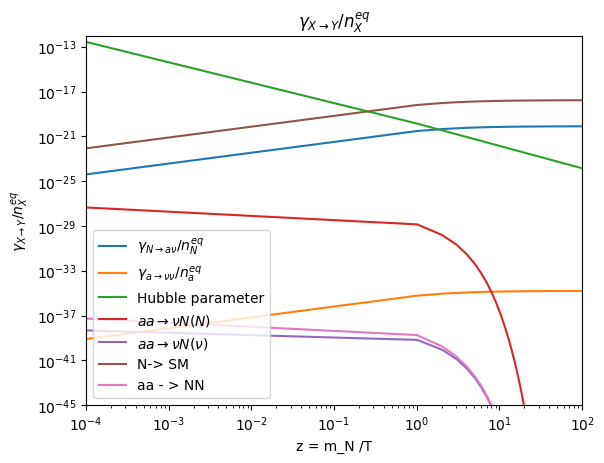

In [488]:
plt.loglog(mass_temp_ratio, gamma_N_av_n_N_eq_ratio_list, label = r'$\gamma_{N \rightarrow a \nu }/ n_{N}^{eq}$')
plt.loglog(mass_temp_ratio, gamma_a_vv_n_N_eq_ratio_list,label = r'$\gamma_{a \rightarrow \nu \nu }/ n_{a}^{eq}$' )
plt.loglog(mass_temp_ratio, H_list, label = 'Hubble parameter' )
plt.loglog(mass_temp_ratio, aa_vN_ratio_list, label = r'$ aa \rightarrow \nu N (N)$')
plt.loglog(mass_temp_ratio, aa_vN_v_med_ratio_list, label = r'$ aa \rightarrow \nu N (\nu )$')
plt.loglog(mass_temp_ratio, gamma_N_SM_n_N_eq_ratio_list, label = 'N-> SM')
plt.loglog(mass_temp_ratio, aa_NN_ratio_list, label = 'aa - > NN' )
plt.xlim(1e-4, 1e2)
plt.ylim(1e-45, 1e-12)
plt.title(r'$\gamma_{X \rightarrow Y }/ n_{X}^{eq}$')
plt.xlabel("z = m_N /T")
plt.ylabel(r'$\gamma_{X \rightarrow Y }/ n_{X}^{eq}$')
plt.legend()
plt.show()


